Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus Project

**Warning:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview
This notebook explores Dandiset 000690 version 0.250326.0015 from the Allen Institute's OpenScope Vision2Hippocampus project. The dataset contains extracellular electrophysiology recordings from mouse brains using Neuropixels probes during visual stimulation.

- **Dandiset URL:** https://dandiarchive.org/dandiset/000690/0.250326.0015
- **Study Goal:** Investigate how neural representations of visual stimuli evolve from thalamus through visual cortex to hippocampus
- **Stimuli:** Simple visual motion (bars of light) and complex natural stimuli (movies)
- **Subjects:** Mice with Neuropixels probes targeting visual cortex and hippocampus

## Notebook Contents
This notebook will demonstrate:
1. How to connect to and load data from the DANDI archive
2. Basic exploration of NWB file structure and metadata
3. Visualization of LFP data and electrode positions
4. Simple analysis of neural responses

## Required Packages
- pynwb
- numpy
- matplotlib
- remfile
- h5py

## Loading the Dandiset

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading an NWB File
We'll examine data from probe 0 of subject 692072:  
`sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb`  
Asset ID: ba8760f9-91fe-4c1c-97e6-590bed6a783b

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Summary

In [3]:
print("Session Description:", nwb.session_description)
print("Session Start Time:", nwb.session_start_time)
print("Subject ID:", nwb.subject.subject_id)
print("Subject Age:", nwb.subject.age)
print("Subject Sex:", nwb.subject.sex)
print("Number of Electrodes:", len(nwb.electrodes.id[:]))
print("Probe Type:", nwb.devices["probeA"].description)

Session Description: LFP data and associated info for one probe
Session Start Time: 2023-09-21 00:00:00-07:00
Subject ID: 692072
Subject Age: P82D
Subject Sex: M
Number of Electrodes: 95
Probe Type: Neuropixels 1.0 Probe


## Exploring LFP Data

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Get LFP data and electrodes
lfp_data = nwb.acquisition['probe_0_lfp_data']
electrodes = nwb.electrodes.to_dataframe()

# Print data shape and sampling rate
print("LFP Data Shape:", lfp_data.data.shape)
print("Sampling Rate:", nwb.electrode_groups["probeA"].lfp_sampling_rate, "Hz")

LFP Data Shape: (10117092, 95)
Sampling Rate: 625.0 Hz


### LFP Traces (First 5 Channels)

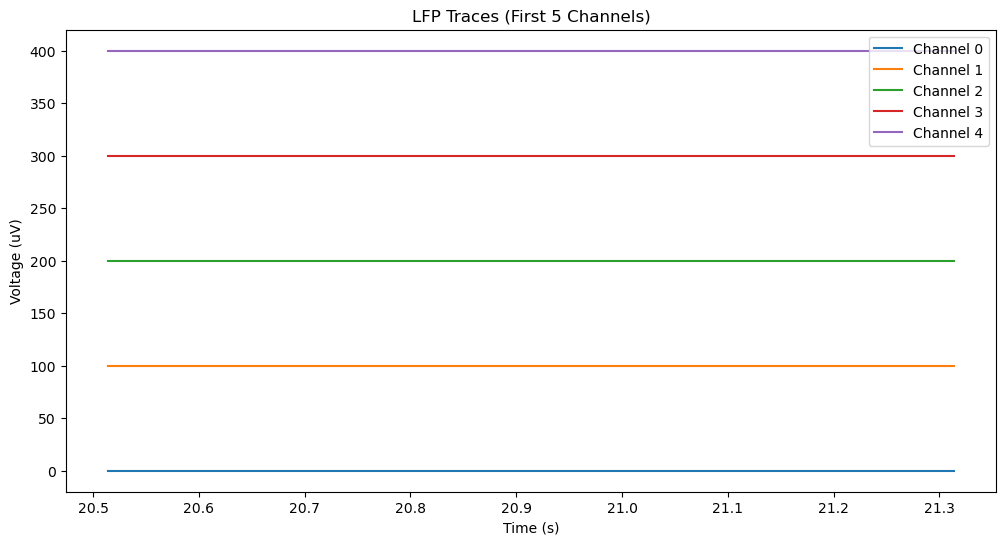

In [5]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(lfp_data.timestamps[:1000], lfp_data.data[:1000, i] + i*100, 
             label=f'Channel {i}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.title('LFP Traces (First 5 Channels)')
plt.legend()
plt.show()

### Electrode Positions

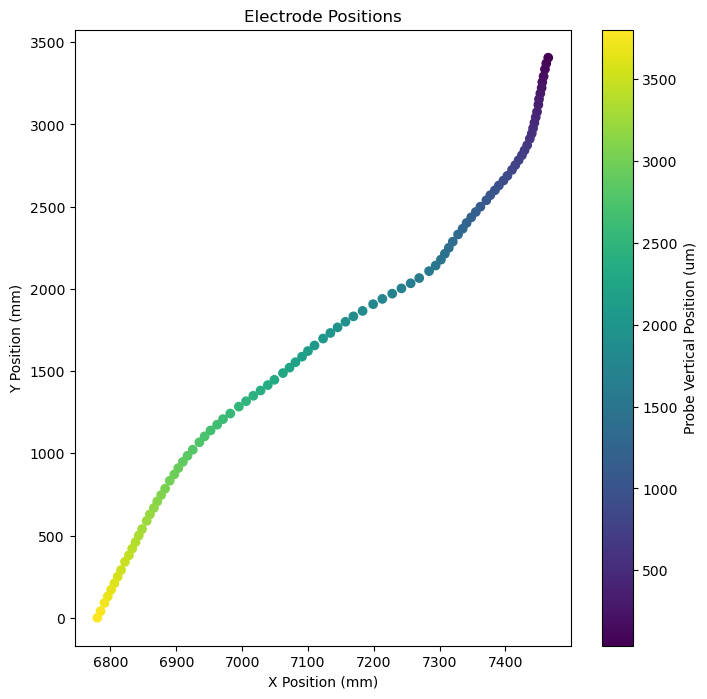

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(electrodes['x'], electrodes['y'], c=electrodes['probe_vertical_position'])
plt.colorbar(label='Probe Vertical Position (um)')
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.title('Electrode Positions')
plt.show()

## Basic Analysis
Let's compute and visualize the power spectrum for one channel to see the frequency content.

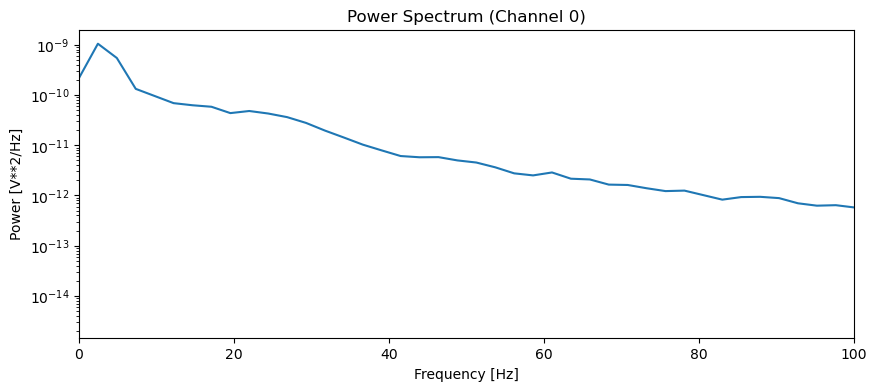

In [7]:
from scipy import signal

# Compute power spectrum for first channel
fs = nwb.electrode_groups["probeA"].lfp_sampling_rate
f, Pxx = signal.welch(lfp_data.data[:10000, 0], fs=fs)

plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [V**2/Hz]')
plt.title('Power Spectrum (Channel 0)')
plt.xlim(0, 100)  # Focus on lower frequencies
plt.show()

## Summary and Next Steps
We've demonstrated how to:
- Load data from the Vision2Hippocampus Dandiset
- Access and visualize LFP data from Neuropixels recordings
- Examine electrode positions and basic signal properties

**Potential Next Steps:**
- Analyze responses to specific stimuli
- Compute cross-channel correlations
- Examine spatial patterns in oscillatory activity
- Investigate stimulus-locked responses

**Explore further on Neurosift:**  
[Visualize this NWB file](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=draft)